In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

from eoles.write_output import comparison_simulations, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand, colormap_simulations
from pathlib import Path
from project.write_output import plot_compare_scenarios

# Comparison policy scenarios costs

In [5]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'}, waterfall=True)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

KeyError: 'Efficiency subsidies insulation (euro/kWh standard)'

# Sensitivity analysis

In [4]:
total_system_costs_2050_df = colormap_simulations(overall_folder=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  config_ref=None,
                                                  save_path=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  subset_configs=['Ban', 'BanRef', 'BanNoPolicy'],
                                                  percent=True,
                                                  reorder=['BanRef', 'BanNoPolicy'],
                                                  dict_scenario={
                                                      'BanRef': 'Package 2021 + Ban',
                                                      'BanNoPolicy': 'No Policy + Ban'
                                                  },
                                                  dict_config_demandsupply={
                                                      'Elasticity-': 'Lower Elasticity HP',
                                                      'LearningHP+': 'Technical Progress HP',
                                                      'biogasBiogas-': 'Lower Biogas Potential',
                                                      'capaNuc-': 'Lower Nuclear Potential',
                                                      'capaRen-': 'Lower Renewable Potential',
                                                      'capaRen+': 'Higher Renewable Potential',
                                                      'costscostsREN+': 'Higher Renewable Costs',
                                                      'demandReindustrialisation': 'Higher Electricity Demand',
                                                      'demandSobriete': 'Lower Electricity Demand',
                                                      'weather2012': 'Colder Weather'
                                                  }
                                                    )

# Hourly balance

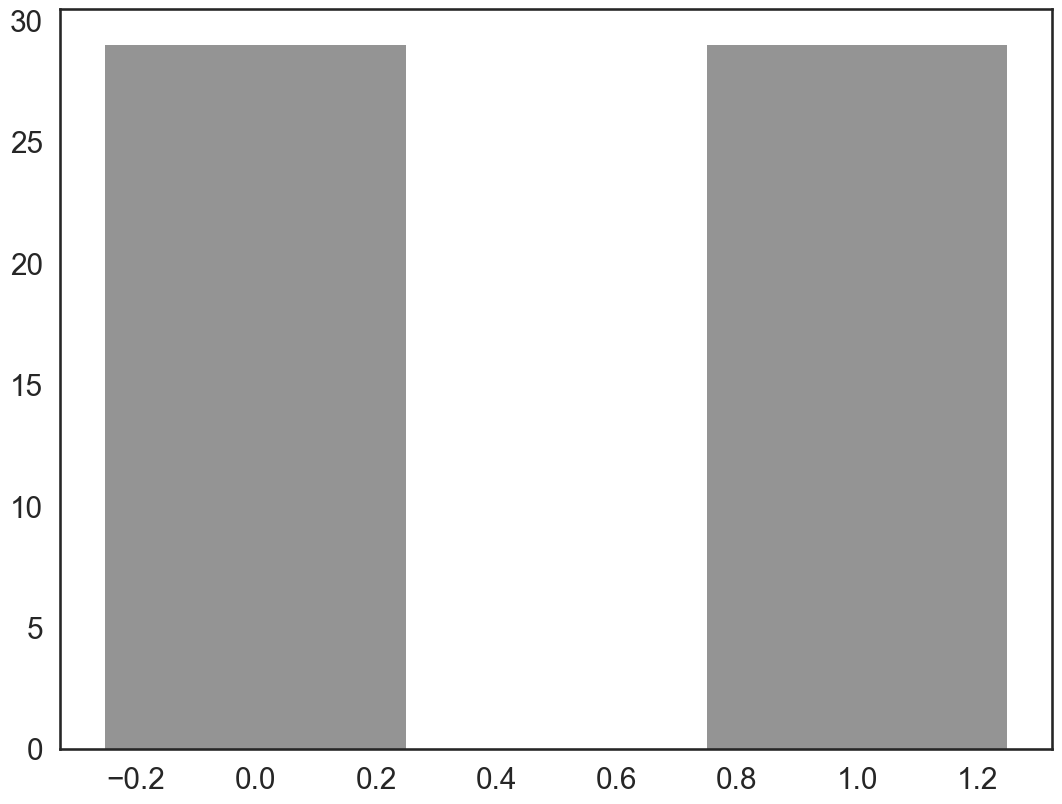

In [35]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [2]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [29]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

In [30]:
hourly_generation.hydrogen_charge.plot()

count    8760.000000
mean        4.584872
std         2.991499
min         0.000000
25%         4.212162
50%         4.566210
75%         6.055786
max         8.953740
Name: electrolysis, dtype: float64

In [31]:
hourly_generation.hydrogen.iloc[0:1000].plot()

In [34]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

0       28.181125
1       29.091650
2       29.437800
3       29.430275
4       29.106700
          ...    
8755    24.034850
8756    24.080000
8757    23.929500
8758    23.666125
8759    23.417800
Name: offshore_f, Length: 8760, dtype: float64

In [6]:
hourly_generation.hydrogen_in.describe()